In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Here's a brief description of linear regression.  In linear regression, we are given a set of input values, such as square footage of a house and number of bedrooms.  And we are asked to predict an output, such as the price of the house.  We are given training samples of houses for which we know the input and the output, in this case, square footage, number of bedrooms, and the price.  We are asked to create a function that would take the input and calculate the output, so that later on, given just the square footage and the number of bedrooms, we can predict the price.

An example of the data would look like something below, and we are trying to find correlation between the x axis and the y axis.  In this example, we only have one input x, so it is easier to visualize.  In reality, we may have multiple x's.

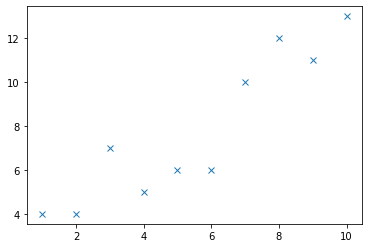

In [3]:
plt.plot([1,2,3,4,5,6,7,8,9,10], [4,4,7,5,6,6,10,12,11,13], 'x')

To get started, we are going to make things simpler, so we can more intuitively understand the entire process.  We are going to have one sample, one output, and zero input.  We are going to set out training data to be just the number 5.  Let's call it $y$.

And we will arrive at that number through the formalities of linear regression.  Let's get started.

In [4]:
training_y = 5

We are going to start with a guess.  Let's say we guess the number is 0.  Let's call our guess our hypothesis, $h$.

In [5]:
hypothesis = 0

Then we want to know the difference between our guess and the actual training sample.  And since we want to know the difference whether it is positive or negative, we will square it.  Think of it as the same as calculating standard deviation.  This difference is called the cost.  Let's also divide the square by 2.  We'll see why later.

In [6]:
cost = (hypothesis - training_y) ** 2 / 2
cost

12.5

As we can see, our cost is 12.5.  Our goal is to find the minumum cost, which would indicate that we are being closest the actual training output, $y$.  Before we go about doing that, let's take a look at the graph of all our possible $h$ values and their costs:

In [7]:
possible_hypotheses = np.arange(0, 10, 1)
possible_hypotheses

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
possible_costs = (possible_hypotheses - training_y) ** 2 / 2
possible_costs

array([12.5,  8. ,  4.5,  2. ,  0.5,  0. ,  0.5,  2. ,  4.5,  8. ])

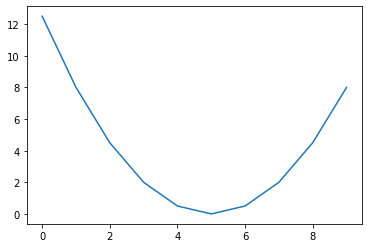

In [9]:
plt.plot(possible_hypotheses, possible_costs)

As we can see here, if we set our $h$ to be 5, we would be at the lowest cost.  That makes sense because we know our $y$ is 5.  But how can we get there from our current $h$ of 0?  Well, we can take a look at the slope.

If our current slope is negative, we need to increase $h$.

If our current slope is positive, we need to decrease $h$.

And how do we find the slope?  It's the derivative of the cost function.  The cost function is

$$
\frac 1 2(h - y)^2
$$

So the derivative would be

$$
h - y
$$

Now we see why we divided by 2 earlier, but it doesn't really matter because we are going to scale this value when we increase or decrease our guess.

So right now, with our guess of 0, our slope is:

In [10]:
slope = hypothesis - training_y
slope

-5

Since our slope is negative, we are going to increase our guess.  In other words, we are going to subtract the slope from our current guess.  Also, we are going to multiply the slope by a factor, called the learning rate $\alpha$, so that we don't adjust our guess by too much at a time.  Let's say our learning rate $\alpha$ is 0.1.

In [11]:
learning_rate_alpha = 0.1
hypothesis = hypothesis - learning_rate_alpha * slope
hypothesis

0.5

And we have successfully increased our guess by 0.5.  Now we repeat the process until our slope is near 0.

In [12]:
slope = hypothesis - training_y
slope

-4.5

In [13]:
hypothesis = hypothesis - learning_rate_alpha * slope
hypothesis

0.95

In [14]:
slope = hypothesis - training_y
slope

-4.05

In [15]:
hypothesis = hypothesis - learning_rate_alpha * slope
hypothesis

1.355

In [16]:
def find_minimum():
    hypothesis = 0
    iteration = 0
    acceptable_slope = 0.05
    learning_rate_alpha = 0.1
    slope = hypothesis - training_y
    cost = 0
    while abs(slope) > acceptable_slope and iteration < 100:
        cost = (hypothesis - training_y) ** 2 / 2
        slope = hypothesis - training_y
        hypothesis = hypothesis - learning_rate_alpha * slope
        print((hypothesis, slope, cost))
        iteration += 1
    return (hypothesis, slope, cost)

In [17]:
find_minimum()

(0.5, -5, 12.5)
(0.95, -4.5, 10.125)
(1.355, -4.05, 8.20125)
(1.7195, -3.645, 6.6430125)
(2.04755, -3.2805, 5.380840125)
(2.342795, -2.95245, 4.358480501249999)
(2.6085155, -2.657205, 3.5303692060124994)
(2.8476639500000003, -2.3914845, 2.8595990568701244)
(3.062897555, -2.1523360499999997, 2.3162752360648007)
(3.2566077995000002, -1.9371024449999998, 1.8761829412124886)
(3.43094701955, -1.7433922004999998, 1.5197081823821157)
(3.587852317595, -1.56905298045, 1.230963627729514)
(3.7290670858354997, -1.412147682405, 0.9970805384609065)
(3.8561603772519497, -1.2709329141645003, 0.8076352361533345)
(3.9705443395267546, -1.1438396227480503, 0.654184541284201)
(4.073489905574079, -1.0294556604732454, 0.529889478440203)
(4.166140915016671, -0.9265100944259208, 0.4292104775365643)
(4.249526823515004, -0.8338590849833292, 0.3476604868046175)
(4.324574141163504, -0.7504731764849959, 0.2816049943117399)
(4.392116727047154, -0.6754258588364959, 0.22810004539250903)
(4.452905054342438, -0.60788327

(4.956360182159561, -0.04848868648937632, 0.0011755763587325129)

That is how we get to 5.

As an exercise, do the same thing with a starting guess of 10.